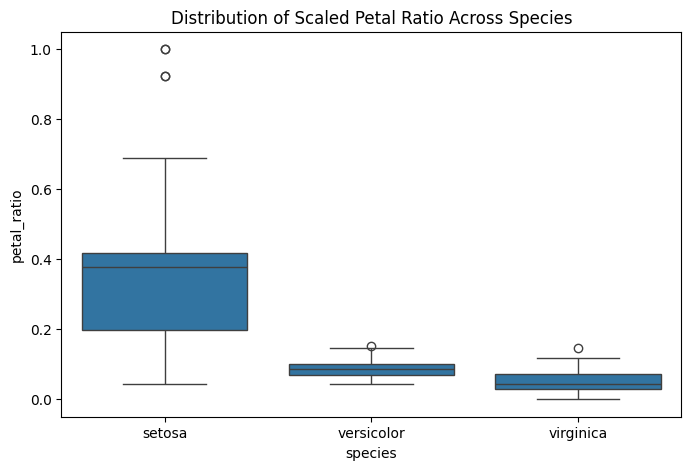

Sorted Correlation with 'petal_ratio':
 petal_ratio     1.000000
sepal_width     0.367547
sepal_length   -0.573856
petal_length   -0.700366
petal_width    -0.748906
Name: petal_ratio, dtype: float64


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = sns.load_dataset("iris")


df['petal_ratio'] = np.divide(
    df['petal_length'], 
    df['petal_width'], 
    out=np.zeros_like(df['petal_length']), 
    where=df['petal_width'] != 0
)


scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_ratio']])
scaled_df = pd.DataFrame(scaled_features, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_ratio'])
scaled_df['species'] = df['species']


plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='petal_ratio', data=scaled_df)
plt.title("Distribution of Scaled Petal Ratio Across Species")
plt.show()


corr = scaled_df.corr(numeric_only=True)
print("Sorted Correlation with 'petal_ratio':\n", corr['petal_ratio'].sort_values(ascending=False))
